In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [29]:
import os
import pandas as pd
data_dir = r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation"
filepaths = []
labels = []
for label in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, label)
    if os.path.isdir(class_folder):
        for filename in os.listdir(class_folder):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                filepaths.append(os.path.join(class_folder, filename))
                labels.append(label)
df = pd.DataFrame({
    'filepath': filepaths,
    'label': labels })
df['class_id'] = df['label'].map({'fire': 0, 'nofire': 1})
print(df.info())
print(df.head())
print(df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  1832 non-null   object
 1   label     1832 non-null   object
 2   class_id  1832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 43.1+ KB
None
                                            filepath label  class_id
0  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
1  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
2  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
3  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
4  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
                                               filepath   label  class_id
1827  C:\Users\Anushka\Desktop\Forest Fire Detection...  nofire         1
1828  C:\Users\Anushka\Desktop\Forest Fire Detection...  nofire         1
1829  C:\Use

In [30]:
# Imports: Combining necessary libraries for clarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Sequential

# --- Data Loading and Preprocessing ---

# CRITICAL FIX: The pixel values (0-255) must be scaled to 0-1.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming 'Training and Validation' is the training set and 'Testing' is the validation/test set.
train_dataset = train_datagen.flow_from_directory(
    r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_dataset = test_datagen.flow_from_directory(
    r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [31]:
train = ImageDataGenerator(rescale=1/25)
test = ImageDataGenerator(rescale=1/25)
train_dataset = train.flow_from_directory(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [32]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [33]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu' ,input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
r= model.fit(train_dataset, epochs=7, validation_data= test_dataset)

Epoch 1/7


c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.8401 - loss: 0.5752 - val_accuracy: 0.9118 - val_loss: 0.3017
Epoch 2/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 315ms/step - accuracy: 0.9454 - loss: 0.1727 - val_accuracy: 0.8088 - val_loss: 0.4540
Epoch 3/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.9492 - loss: 0.1531 - val_accuracy: 0.9118 - val_loss: 0.2314
Epoch 4/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 320ms/step - accuracy: 0.9558 - loss: 0.1341 - val_accuracy: 0.9559 - val_loss: 0.1977
Epoch 5/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - accuracy: 0.9531 - loss: 0.1299 - val_accuracy: 0.9265 - val_loss: 0.1722
Epoch 6/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.9672 - loss: 0.1022 - val_accuracy: 0.9265 - val_loss: 0.1495
Epoch 7/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step - accuracy: 0.9722 - loss: 0.0790 - val_accuracy: 0.8088 - val_loss: 0.4741


In [36]:
predictions=model.predict(test_dataset)
predictions= np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


In [37]:
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [38]:
print(len(predictions))

68


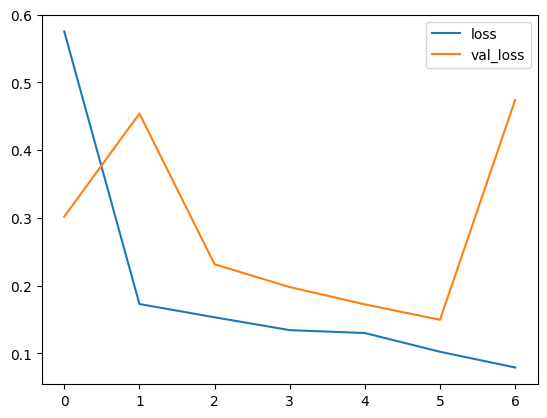

In [39]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

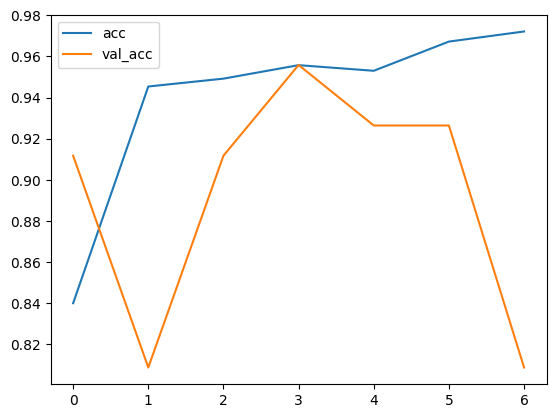

In [40]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [3]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    val= model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("No Fire",fontsize=30)
    elif val==0:
        plt.xlabel("Fire",fontsize=30)    

In [4]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation\fire\abc022.jpg")

NameError: name 'image' is not defined

In [5]:
predictImage(r'C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation\nofire\abc193.jpg')

NameError: name 'image' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.]]


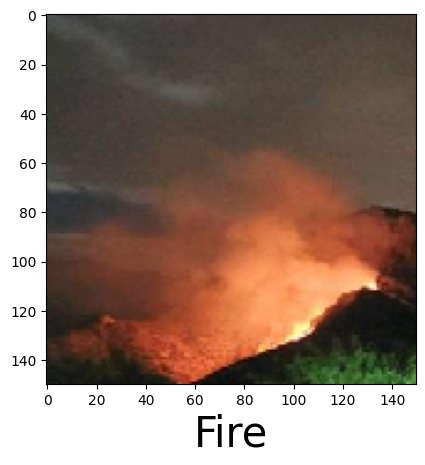

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\fire\abc170.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.]]


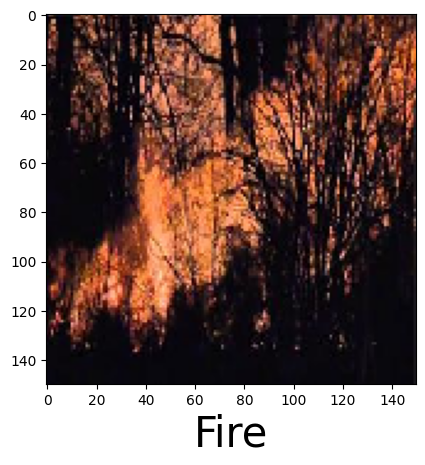

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\fire\abc189.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.]]


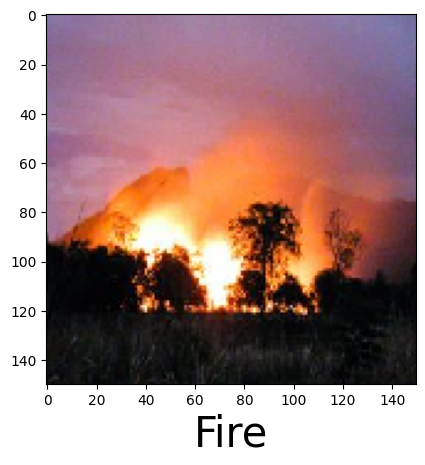

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\fire\abc183.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[1.]]


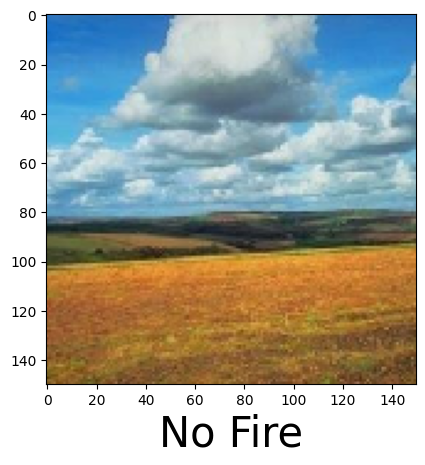

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc352.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[1.]]


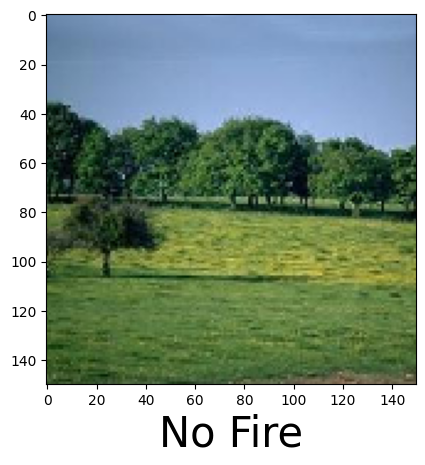

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc340.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[1.]]


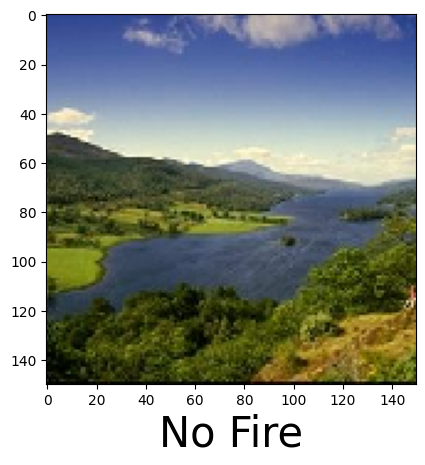

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc376.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[1.]]


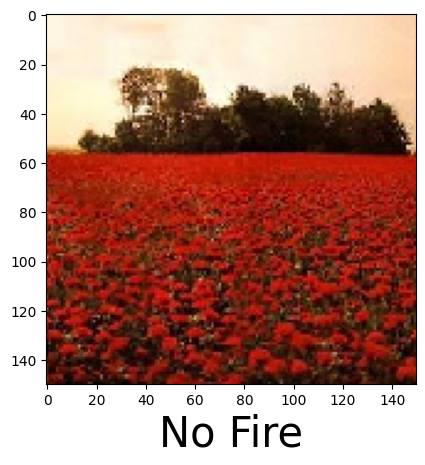

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc360.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.]]


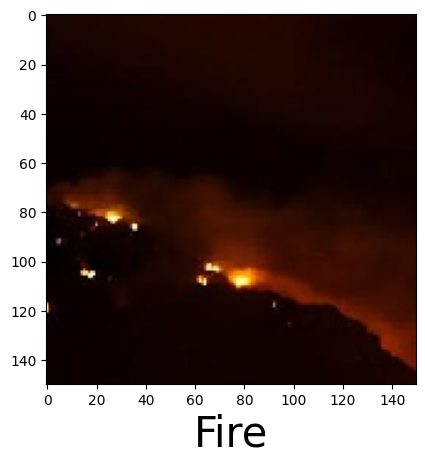

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\fire\abc172.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[1.]]


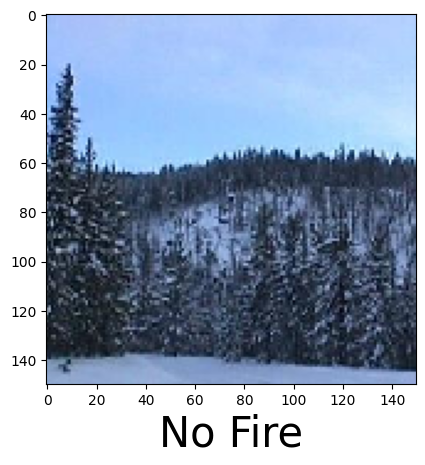

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc374.jpg")

In [6]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc360.jpg")

NameError: name 'image' is not defined